In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df1 = pd.read_csv('Iris_Labeled.csv')

K	SSE		Silhouette Coefficient	Iterations
2	152.37		0.00612			1
3	143.45		0.00970			6
4	57.47		0.01279			8
5	49.88		0.01211			9


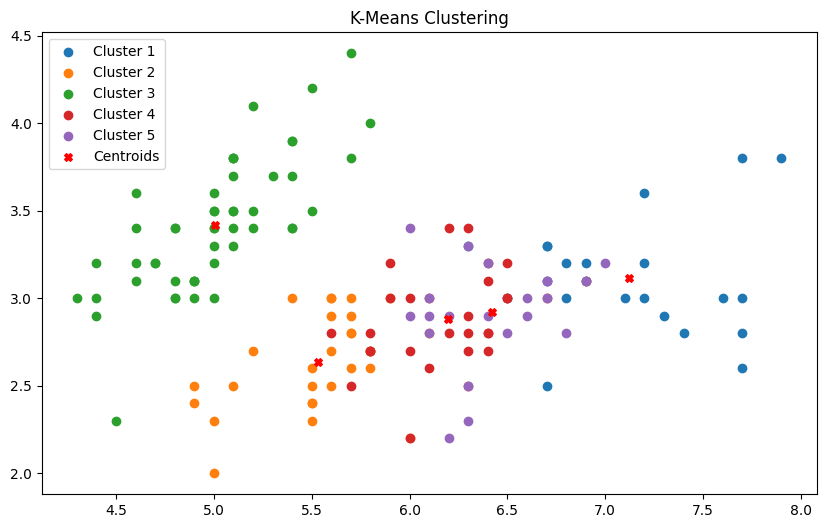

In [5]:
X = df.values
X = df1.iloc[:, :-1].values
labels = df1.iloc[:, -1].values
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))
def kmeans_a(X, k, max_iters=1000):
    n_samples, n_features = X.shape
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    for _ in range(max_iters):
        clusters = [[] for _ in range(k)]
        for idx, sample in enumerate(X):
            distances = [euclidean_distance(sample, point) for point in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)
        new_centroids = np.array([np.mean(X[cluster], axis=0) for cluster in clusters])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters, _
def kmeans_b(X, initial_centroids, max_iters=1000):
    k = len(initial_centroids)
    centroids = np.array(initial_centroids)
    for iteration in range(max_iters):
        clusters = [[] for _ in range(k)]
        for idx, sample in enumerate(X):
            distances = [euclidean_distance(sample, point) for point in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(idx)
        new_centroids = np.array([np.mean(X[cluster], axis=0) for cluster in clusters])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, clusters, iteration + 1
def calculate_sse(X, centroids, clusters):
    sse = 0
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            sse += euclidean_distance(X[idx], centroids[i]) ** 2
    return sse
def silhouette_score(X, clusters):
    n_samples = len(X)
    s = 0
    for i, cluster in enumerate(clusters):
        for idx in cluster:
            a = np.mean([euclidean_distance(X[idx], X[idx2]) for idx2 in cluster if idx != idx2])
            b = np.min([np.mean([euclidean_distance(X[idx], X[idx2]) for idx2 in other_cluster]) for other_cluster in clusters if other_cluster != cluster])
        s += (b - a) / max(a, b)
    return s / n_samples
def get_initial_centroids(X, labels, k):
    unique_labels = np.unique(labels)
    initial_centroids = []
    for label in unique_labels:
        if k == 0:
            break
        initial_centroids.append(X[labels == label][0])
        k -= 1
    return initial_centroids

best_sse = float('inf')
best_k = 0
results1 = []

for k in range(2, 6):
    centroids, clusters, iter = kmeans_a(X, k)
    sse = calculate_sse(X, centroids, clusters)
    s = silhouette_score(X, clusters)
    if sse < best_sse:
        best_sse = sse
        best_k = k
    results1.append((k, sse, s, iter))

print("K\tSSE\t\tSilhouette Coefficient\tIterations")
for k, sse, silhouette, n_iters in results1:
    print(f"{k}\t{sse:.2f}\t\t{silhouette:.5f}\t\t\t{n_iters}")
centroids, clusters, iter = kmeans_a(X, best_k)
plt.figure(figsize=(10, 6))

for i in range(best_k):    
    cluster_points = X[clusters[i]]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

K	SSE		Silhouette Coefficient	Iterations
2	152.37		0.00612			2
3	78.94		0.00927			4


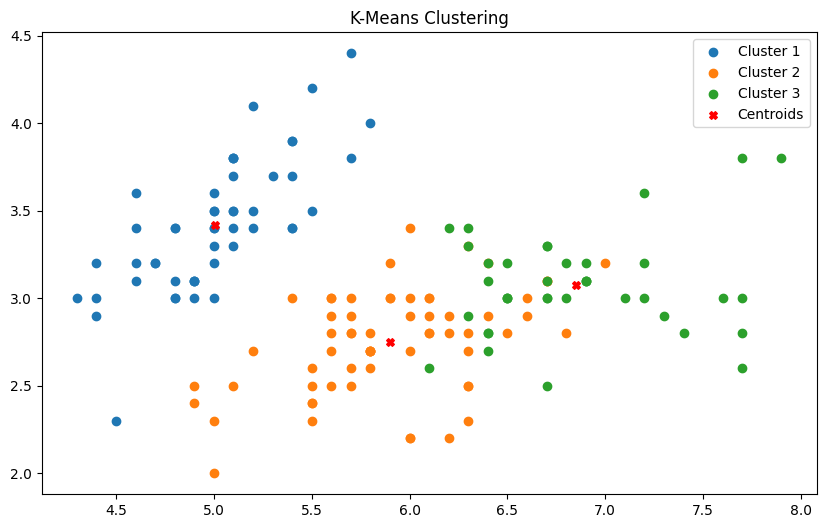

In [6]:
k_values = [2, 3]
results = []

for k in k_values:
    initial_centroids = get_initial_centroids(X, labels, k)
    centroids, clusters, n_iters = kmeans_b(X, initial_centroids)
    sse = calculate_sse(X, centroids, clusters)
    silhouette = silhouette_score(X, clusters)
    results.append((k, sse, silhouette, n_iters))

print("K\tSSE\t\tSilhouette Coefficient\tIterations")
for k, sse, silhouette, n_iters in results:
    print(f"{k}\t{sse:.2f}\t\t{silhouette:.5f}\t\t\t{n_iters}")

best_k = 3
initial_centroids = get_initial_centroids(X, labels, best_k)
centroids, clusters, _ = kmeans_b(X, initial_centroids)

plt.figure(figsize=(10, 6))
for i in range(best_k):
    cluster_points = X[clusters[i]]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=30, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

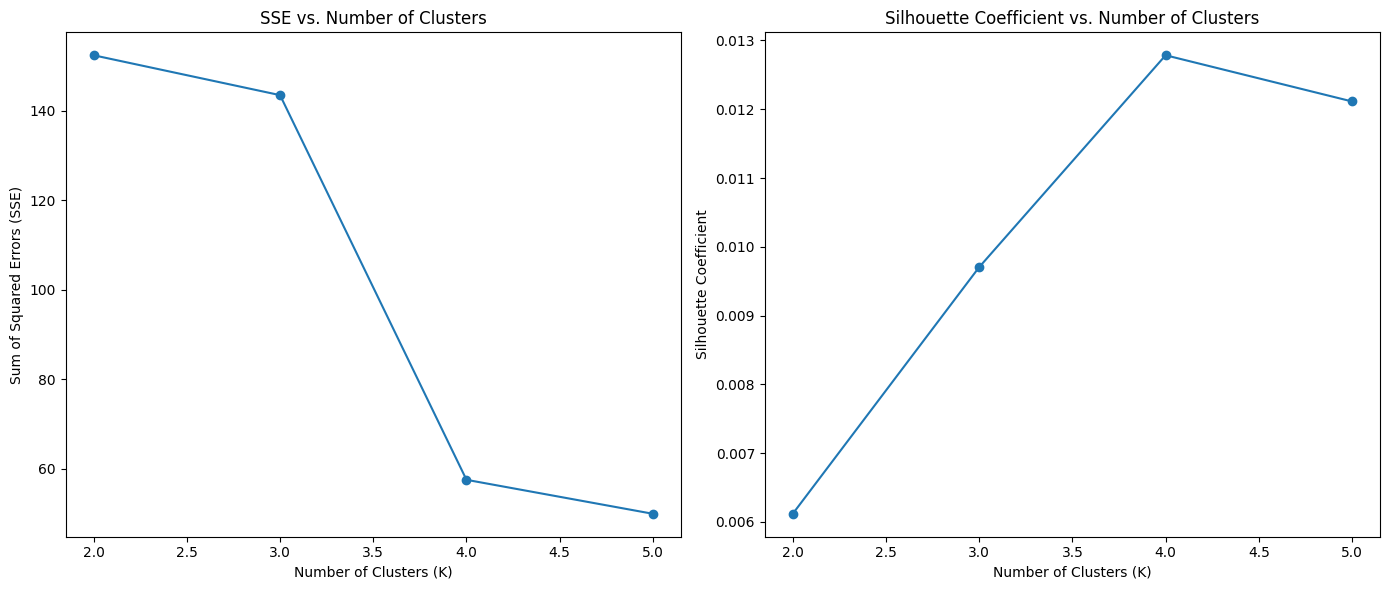

In [7]:
k_values = [result[0] for result in results1]
sse_values = [result[1] for result in results1]
silhouette_values = [result[2] for result in results1]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs. Number of Clusters')

plt.tight_layout()
plt.show()

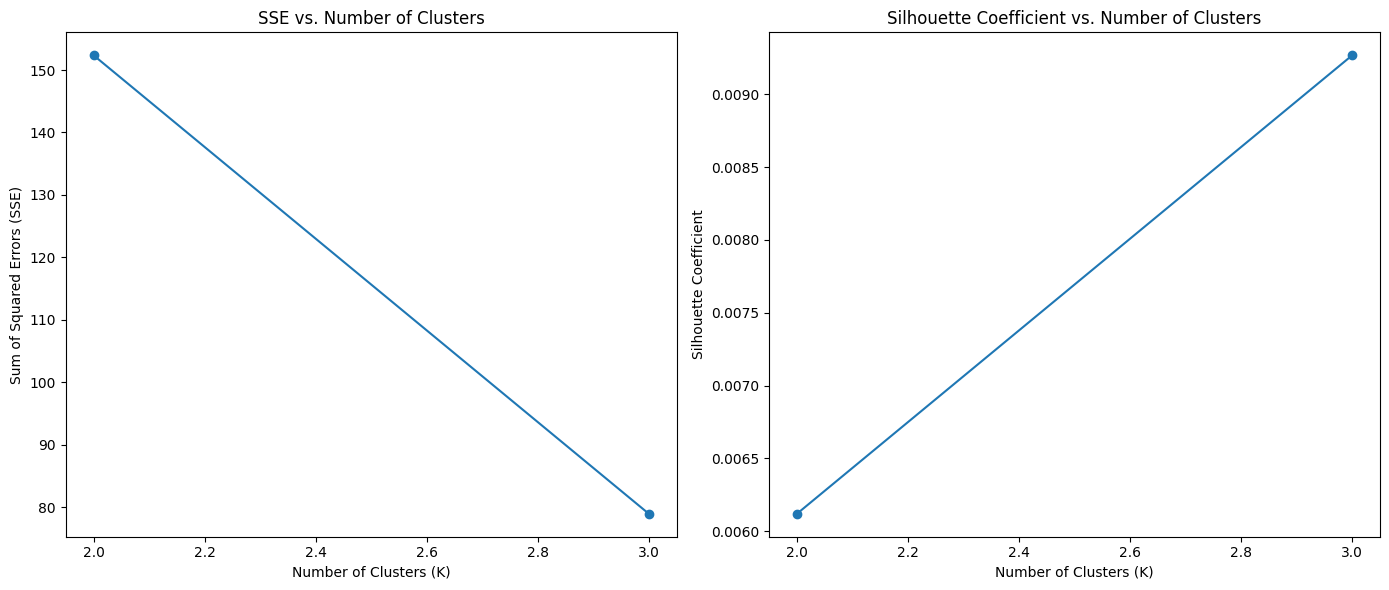

In [8]:
k_values = [result[0] for result in results]
sse_values = [result[1] for result in results]
silhouette_values = [result[2] for result in results]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient vs. Number of Clusters')

plt.tight_layout()
plt.show()